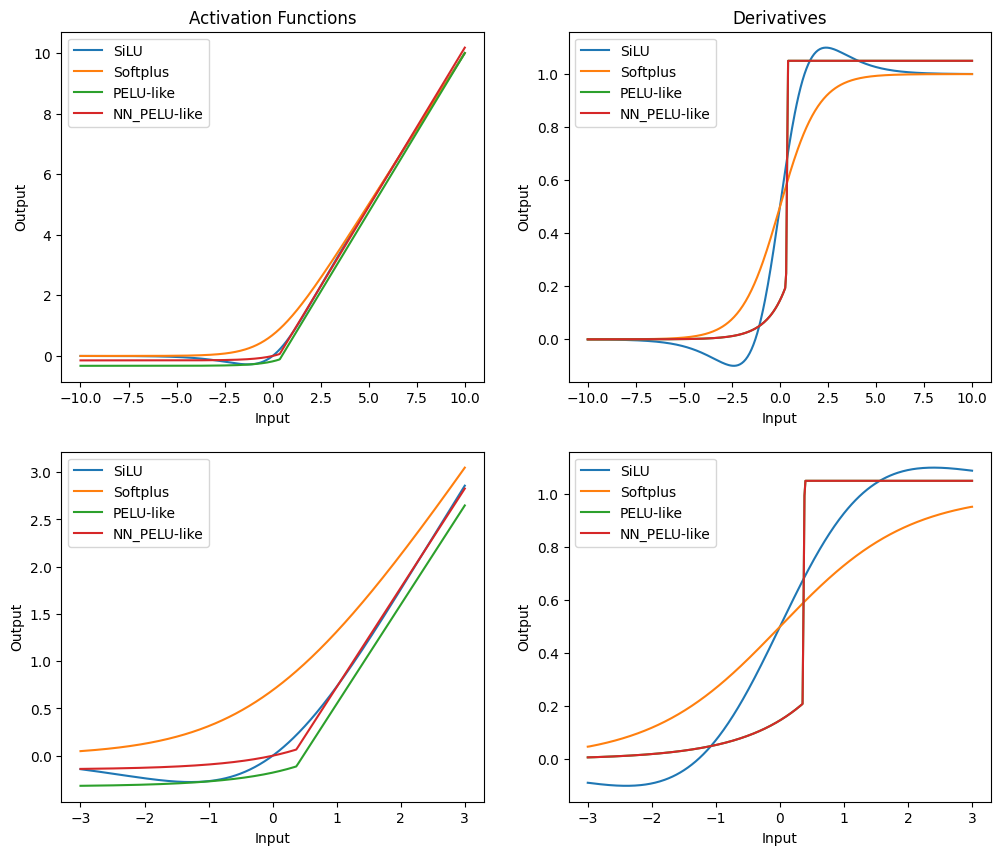

Gradient Comparison at Different x Values
       x |       SiLU |   Softplus |   PELULike | NN_PELULike
--------------------------------------------------
    -5.0 |    -0.0268 |     0.0068 |     0.0010 |     0.0010
    -2.0 |    -0.0897 |     0.1214 |     0.0203 |     0.0203
    -1.0 |     0.0794 |     0.2734 |     0.0553 |     0.0553
     0.0 |     0.4875 |     0.4937 |     0.1432 |     0.1432
     0.2 |     0.5872 |     0.5437 |     0.1750 |     0.1750
     0.4 |     0.6836 |     0.5929 |     0.6754 |     0.6754
     0.5 |     0.7293 |     0.6168 |     1.0502 |     1.0502
     1.0 |     0.9206 |     0.7266 |     1.0502 |     1.0502
     2.0 |     1.0897 |     0.8786 |     1.0502 |     1.0502
     5.0 |     1.0268 |     0.9932 |     1.0502 |     1.0502
    10.0 |     1.0004 |     1.0000 |     1.0502 |     1.0502


Output Values at Different x Values
       x |       SiLU |   Softplus |   PELULike | NN_PELULike
--------------------------------------------------
    -5.0 |    -0.0335 |

In [1]:
from utils.activations import Activation
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

silu = Activation("silu")
softplus = Activation("softplus")
pelulike = Activation("pelulike")
nn_pelulike = Activation("nn_pelulike")

x = torch.Tensor(np.linspace(-10, 10, 400))
dx = x[1]-x[0]

z = torch.Tensor(np.linspace(-3, 3, 400))
dz = z[1]-z[0]

grad_silu = np.gradient(silu(x).numpy(), dx.item())
grad_softplus = np.gradient(softplus(x).numpy(), dx.item())
grad_pelulike = np.gradient(pelulike(x).numpy(), dx.item())
grad_nnpelulike = np.gradient(nn_pelulike(x).numpy(), dx.item())

grad_silu_z = np.gradient(silu(z).numpy(), dz.item())
grad_softplus_z = np.gradient(softplus(z).numpy(), dz.item())
grad_pelulike_z = np.gradient(pelulike(z).numpy(), dz.item())
grad_nnpelulike_z = np.gradient(nn_pelulike(z).numpy(), dz.item())

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0,0].plot(x, silu(x), label="SiLU")
ax[0,0].plot(x, softplus(x), label="Softplus")
ax[0,0].plot(x, pelulike(x), label="PELU-like")
ax[0,0].plot(x, nn_pelulike(x), label="NN_PELU-like")
ax[0,0].set_title("Activation Functions")
ax[0,0].set_xlabel("Input")
ax[0,0].set_ylabel("Output")
ax[0,0].legend()

ax[0,1].plot(x, grad_silu, label="SiLU")
ax[0,1].plot(x, grad_softplus, label="Softplus")
ax[0,1].plot(x, grad_pelulike, label="PELU-like")
ax[0,1].plot(x, grad_nnpelulike, label="NN_PELU-like")
ax[0,1].set_title("Derivatives")
ax[0,1].set_xlabel("Input")
ax[0,1].set_ylabel("Output")
ax[0,1].legend()

ax[1,0].plot(z, silu(z), label="SiLU")
ax[1,0].plot(z, softplus(z), label="Softplus")
ax[1,0].plot(z, pelulike(z), label="PELU-like")
ax[1,0].plot(z, nn_pelulike(z), label="NN_PELU-like")
ax[1,0].set_xlabel("Input")
ax[1,0].set_ylabel("Output")
ax[1,0].legend()

ax[1,1].plot(z, grad_silu_z, label="SiLU")
ax[1,1].plot(z, grad_softplus_z, label="Softplus")
ax[1,1].plot(z, grad_pelulike_z, label="PELU-like")
ax[1,1].plot(z, grad_nnpelulike_z, label="NN_PELU-like")
ax[1,1].set_xlabel("Input")
ax[1,1].set_ylabel("Output")
ax[1,1].legend()
plt.show()

print("Gradient Comparison at Different x Values")
print(f"{'x':>8} | {'SiLU':>10} | {'Softplus':>10} | {'PELULike':>10} | {'NN_PELULike':>10}")
print("-" * 50)

test_points = [-5, -2, -1, 0, 0.2, 0.4, 0.5, 1, 2, 5, 10]
for xp in test_points:
    idx = np.argmin(np.abs(x.numpy() - xp))
    print(f"{xp:>8.1f} | {grad_silu[idx]:>10.4f} | {grad_softplus[idx]:>10.4f} | {grad_pelulike[idx]:>10.4f} | {grad_nnpelulike[idx]:>10.4f}")

print("\n")
print("Output Values at Different x Values")
print(f"{'x':>8} | {'SiLU':>10} | {'Softplus':>10} | {'PELULike':>10} | {'NN_PELULike':>10}")
print("-" * 50)

for xp in test_points:
    x_tensor = torch.tensor([xp], dtype=torch.float32)
    s = silu(x_tensor).item()
    sp = softplus(x_tensor).item()
    p = pelulike(x_tensor).item()
    nn = nn_pelulike(x_tensor).item()
    print(f"{xp:>8.1f} | {s:>10.4f} | {sp:>10.4f} | {p:>10.4f} | {nn:>10.4f}")



In [ ]:
import torch
from utils.lightning import LightningMamba
from utils.utils import load_config
from utils.non_negativity import check_non_negativity
from models.mamba_model import MambaModel
from utils.utils import create_scheduler

config = load_config('sc09_class')
MODEL_CONFIG = config["model"]

model = LightningMamba.load_from_checkpoint(
    '/media/data/tmpoulionis/nn_mamba/checkpoints/l2d16: full nn "l2" w=1 seed=42/unclipped.ckpt',
    model=MambaModel(**MODEL_CONFIG, d_out=10),
    optimizer=torch.optim.AdamW,
    loss_fn=torch.nn.CrossEntropyLoss()
)

# for name, params in model.named_parameters():
#     print(name)

In [10]:
results = check_non_negativity(model, verbose=True)

❌ Parameter 'model.mamba_layers.0.A_log
	 19/2048 negative parameters.
	 min: -0.0036047992762178183, max: 2.1350395679473877
✔️ Parameter 'model.mamba_layers.0.D' has no negative values. (128)
❌ Parameter 'model.mamba_layers.0.in_proj.weight
	 4739/16384 negative parameters.
	 min: -0.07062435895204544, max: 1.0259215831756592
❌ Parameter 'model.mamba_layers.0.conv1d.weight
	 158/512 negative parameters.
	 min: -0.17637525498867035, max: 0.43737173080444336
❌ Parameter 'model.mamba_layers.0.conv1d.bias
	 56/128 negative parameters.
	 min: -0.0946476012468338, max: 0.5740828514099121
❌ Parameter 'model.mamba_layers.0.x_proj.weight
	 786/4608 negative parameters.
	 min: -0.08658947050571442, max: 0.7629109025001526
❌ Parameter 'model.mamba_layers.0.dt_proj.weight
	 95/512 negative parameters.
	 min: -0.10709336400032043, max: 0.4807813763618469
❌ Parameter 'model.mamba_layers.0.dt_proj.bias
	 35/128 negative parameters.
	 min: -0.05761946365237236, max: 0.4130134582519531
❌ Parameter 'm

In [4]:
model.eval()
model.forward(torch.rand(1, 151, 64).to('cuda'))

tensor([[3.3820, 4.4682, 3.8768, 4.1538, 3.7599, 5.3751, 4.4802, 4.3823, 3.9660,
         4.0956]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [5]:
from dataloaders.data import create_dataset
import torch

dataset, num_classes = create_dataset(dataset_name="sc09")
train_dataset = dataset['train']
val_dataset = dataset['valid']
test_dataset = dataset["test"]

# Check a few samples
num_negative = 0
num_total = 0
min_val = float('inf')
max_val = float('-inf')
for dataset in [train_dataset, val_dataset, test_dataset]:
    for i in range(min(1000, len(dataset))): 
        x, label = dataset[i]

        num_negative += (x < 0).sum().item()
        num_total += x.numel()
        min_val = min(min_val, x.min().item())
        max_val = max(max_val, x.max().item())
    print(f"In ({dataset}):")
    print(f"Samples checked: {min(100, len(dataset))}")
    print(f"Negative values: {num_negative}/{num_total} ({100*num_negative/num_total:.2f}%)")
    print(f"Min: {min_val:.4f}, Max: {max_val:.4f}\n")

In (<dataloaders.datasets.sc_dataset.SCDataset object at 0x7f724c22e0b0>):
Samples checked: 100
Negative values: 0/6714496 (0.00%)
Min: 0.0000, Max: 1.0000

In (<dataloaders.datasets.sc_dataset.SCDataset object at 0x7f724c22ef80>):
Samples checked: 100
Negative values: 0/13452288 (0.00%)
Min: 0.0000, Max: 1.0000

In (<dataloaders.datasets.sc_dataset.SCDataset object at 0x7f724c22ce80>):
Samples checked: 100
Negative values: 0/20188608 (0.00%)
Min: 0.0000, Max: 1.0000



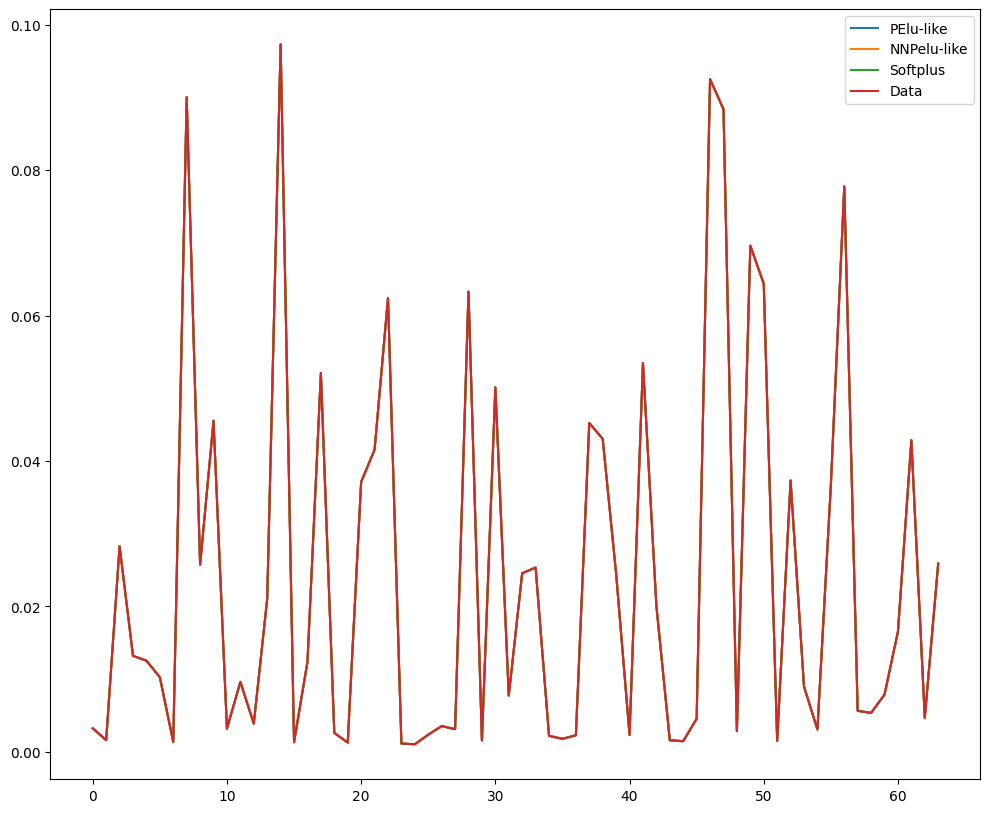

In [4]:
from utils.activations import Activation
import torch.nn as nn
import torch.functional as F
import torch
import math
import matplotlib.pyplot as plt

pelulike = Activation("pelulike")
nn_pelulike = Activation("nn_pelulike")
softplus = nn.Softplus()

dt_min = 1e-3
dt_max = 0.1

dt = torch.exp(
    torch.rand(64) * (math.log(dt_max) - math.log(dt_min))
    + math.log(dt_min)
).clamp(min=1e-4)

pelu_inv = pelulike.inverse(dt)
nnpelu_inv = nn_pelulike.inverse(dt)
softplus_inv = dt + torch.log(-torch.expm1(-dt))

x_pelu = pelulike(pelu_inv)
x_nnpelu = nn_pelulike(nnpelu_inv)
x_softplus = softplus(softplus_inv)

plt.figure(figsize=(12,10))
plt.plot(x_pelu ,label="PElu-like")
plt.plot(x_nnpelu, label="NNPelu-like")
plt.plot(x_softplus, label="Softplus")
plt.plot(dt, label="Data")
plt.legend()
plt.show()

In [1]:
from utils.non_negativity import NonNegativityScheduler

nn_scheduler = NonNegativityScheduler(100, 1, 0.1, 0.2, 0.3)

for i in range(100):
    weights = nn_scheduler.get_weights(i)
    if i%10 == 0 or i==99:
        print(f"weights at {i} step: L2={weights[0]:.2f}, L1={weights[1]:.2f}")

weights at 0 step: L2=0.00, L1=0.00
weights at 10 step: L2=0.00, L1=0.00
weights at 20 step: L2=0.00, L1=0.00
weights at 30 step: L2=0.33, L1=0.00
weights at 40 step: L2=0.67, L1=0.00
weights at 50 step: L2=1.00, L1=0.00
weights at 60 step: L2=0.82, L1=0.18
weights at 70 step: L2=0.64, L1=0.36
weights at 80 step: L2=0.46, L1=0.54
weights at 90 step: L2=0.28, L1=0.72
weights at 99 step: L2=0.12, L1=0.88
